## MTH 9875 The Volatility Surface:    Fall 2018

<p>

### Lecture 3: Affine models


Jim Gatheral   
Department of Mathematics   
  

  
  
<h3><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2016/04/MFE-Logo.jpg" align = "right" width=500></h3>


$$
\newcommand{\bea}{\begin{eqnarray}}
\newcommand{\eea}{\end{eqnarray}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\cF}{\mathcal{F} }
\newcommand{\PP}{\mathbb{P} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\ee}[1]{\mathbb{E}\left[{#1}\right]}
\newcommand{\eef}[1]{\mathbb{E}\left[\left.{#1}\right|\cF_t\right]}
\newcommand{\Rplus}{\mathbb{R}_{\geqslant 0}}
\newcommand{\Rpplus}{\mathbb{R}_{> 0}}
\newcommand{\Rminus}{\mathbb{R}_{\leqslant 0}}
\newcommand{\p}{\partial}
\newcommand{\ui}{\textrm{i}}
\newcommand{\mP}{\mathbb{P}}
\newcommand{\mQ}{\mathbb{Q}}
\newcommand{\angl}[1]{\langle{#1}\rangle}
\newcommand{\var}{{\rm var}}
\newcommand{\cov}{{\rm cov}}
\newcommand{\covf}[1]{\cov\left[\left.{#1}\right|\cF_t\right]}
\newcommand{\varf}[1]{\var\left[\left.{#1}\right|\cF_t\right]}
$$

## Outline of lecture 3

* Forward variance models
* Affine forward variance models
* The classical Heston model
* The rough Heston model
* The characteristic function of an affine forward variance model
    - Classical Heston and rough Heston characteristic functions
* Implementation of the classical and rough Heston models in R
* Numerical experiments

### Forward variance models

Following [Bergomi and Guyon]<sup id="cite_ref-BG" class="reference"><a href="#cite_note-BG"><span>[</span>3<span>]</span></a></sup>, forward variance models may be written in the form 

$$
\beas
dS_t &=& S_t \, \sqrt{v_t}\, \left(\rho dW_t + \sqrt{1 - \rho^2} dW_t^\bot\right)\\
d\xi_t(u) &=& \eta_t(u;\omega) \,dW_t,
\eeas
$$

where $W, W^\bot$ are independent Brownian motions, the $\Rplus$-valued stochastic process $\eta_t(u;\omega)$ is progressively measurable for all $u > 0$ and $\xi$ is linked to the instantaneous variance $v$ by 

$$
\xi_t(T) = \eef{v_T}.
$$

- Models of this form were also studied by Hans Bühler as *variance curve models*. 

- If $v$ is continuous and uniformly integrable, we can recover $v_t$ from $\xi_t(u)$ as $v_t = \lim_{u \downarrow t} \xi_t(u)$.  For our purposes, $v_t = \xi_t(t)$.


- The initial conditions of a forward variance model are the initial stock price $S_t$ and the initial forward variance curve $\xi_t(u)_{u > t}$. 

#### Important remark

As noted by [Bergomi and Guyon]<sup id="cite_ref-BG" class="reference"><a href="#cite_note-BG"><span>[3]</span></a></sup>, all conventional finite-dimensional Markovian stochastic volatility models may be cast as forward variance models.


### The classical Heston model


The classical Heston stochastic volatility model may be written as

$$
\beas
\frac{dS_t}{S_t} &=&  \sqrt{v_t}\,S_t \,dZ_t\\
dv_t &=&  - \lambda \,(v_t - \bar v)\,dt + \eta \,\sqrt {v_t} \,dW_t
\eeas
$$

with $
\ee {dZ_t\,dW_t} = \rho \, dt
$ and where $\lambda$ is the speed of reversion of $v_t$ to its long term
mean $\bar v$.

* The process followed by the instantaneous variance $v_t$ may be recognized as a version of the square root process or CIR process of [Cox, Ingersoll, Ross]<sup id="cite_ref-CIR" class="reference"><a href="#cite_note-CIR"><span>[</span>5<span>]</span></a></sup>.


* It is a (jump-free) special case of a so-called *affine jump diffusion (AJD)*.
  * Roughly speaking a jump-diffusion process for which the drifts and covariances and jump intensities are linear in the state vector (which is $\{ x,v \}$ in this case with $x= \log (S) $).

###### $\mP$ and $\mQ$ measures

* In Heston's original paper, the price of risk is assumed to be linear in the instantaneous variance $v$ in order to be able to retain the form of the dynamics under the transformation from the physical measure $\mP$ to the pricing measure $\mQ$.


* In contrast, in the following, we assume that model dynamics with parameters fitted to option prices generates the pricing measure.
    - All expectations in the following are under $\mQ$.

    

### Forward variance in the Heston model

Recall the Heston variance SDE

$$
dv_t = -\lambda(v - \bar v)\,dt + \eta\,\sqrt{v_t}\,dW_t.
$$

With $\xi_t(u) = \eef{v_u}$, take expectations to get

$$
 d\xi_t(u) = -\lambda\,(\xi_t(u) -\bar v)\,du.
$$

This ODE has the solution

$$
\xi_t(u) = (\xi_t(t)-\bar v)\,e^{-\lambda\,(u-t)}+\bar v = (v_t-\bar v)\,e^{-\lambda\,(u-t)}+\bar v.
$$

### The Heston model in forward variance form

For each $u$, $\xi_t(u)$ is a conditional expectation and so a martingale in $t$.  It is then immediate from the last equation that

$$
d \xi_t(u) = e^{-\lambda\,(u-t)}\,\widehat{d v_t} = \eta\,e^{-\lambda\,(u-t)}\,\sqrt{v_t}\,dW_t
$$

where $\widehat{d v_t}$ denotes the martingale part of $dv_t$.

- It is easy to check explicitly that all drift (*i.e.* $dt$) terms cancel.

### The rough Heston model

By considering the limit of a simple Hawkes process-based model of order flow, [El Euch and Rosenbaum]<sup id="cite_ref-EER" class="reference"><a href="#cite_note-EER">[6]</a></sup> derive a rough Heston model.  The equation for variance in this model takes the form

$$
v_u =  \theta(u) -  \frac{1}{\Gamma(H + 1/2)}  \int_{t}^u (u-s)^{H-1/2} \lambda\, v_s \,ds +\frac{1}{\Gamma(H + 1/2)}  \int_{t}^u (u-s)^{H-1/2} \eta \sqrt{v_s} \,dW_s.
$$

- $H \in (0, 1/2]$ is the Hurst exponent of the volatility, $\lambda>0$ is the mean reversion parameter, $\eta>0$ is the volatility of volatility parameter.

- The function $\theta$ is assumed to be continuous and represents a time-dependent mean reversion level.

- The rough Heston model generalizes the classical Heston model which is recovered when $H=1/2$.

### Forward variance in the rough Heston model

- We will consider only the special case $\lambda=0$.  In this case,
$\xi_t(u) = \eef{v_u}= \theta(u)$.

- It follows that
<p>
$$
v_u =  \xi_t(u)  +\frac{1}{\Gamma(H + 1/2)}  \int_{t}^u (u-s)^{H-1/2} \eta \sqrt{v_s} \,dW_s.
$$

- Also

$$
v_u =  \xi_{t+h}(u)  +\frac{1}{\Gamma(H + 1/2)}  \int_{t+h}^u (u-s)^{H-1/2} \eta \sqrt{v_s} \,dW_s.
$$


### The rough Heston model in forward variance form

Subtracting these two equations gives

$$
 \xi_{t+h}(u) -  \xi_{t}(u) = \frac{1}{\Gamma(H + 1/2)} \, \int_t^{t+h} (u-s)^{H-1/2} \eta \sqrt{v_s} \,dW_s.
$$

Taking the limit $h \to 0$, we obtain 

$$
d\xi_{t}(u) = \frac{\eta}{{\Gamma(H + 1/2)}}\,(u-t)^{H-1/2}\, \sqrt{v_t} \,dW_t,
$$

the rough Heston model in forward variance form.


### Non-Markovianity of the rough Heston model

- Note that the limit $u \to t$ of the rough Heston model makes no sense.
    - This reflects the fact that the rough Heston model is not Markovian.
    - There is no SDE for $v_t$ and no corresponding PDE.
    - On the other hand, we can write an SDE for each $\xi_t(u)$, $u>t$.
      - We can even apply Itô's Lemma!
 
 
- The rough Heston model is Markovian in the infinite-dimensional forward variance curve $\xi_t(u), \, u>t$.

### Affine processes

The following explanation is due to Martin Keller-Ressel:

>An *affine process* can be described as a Markov process whose log-characteristic function is an affine 
function of its initial state vector.


And here's a definition of the word *affine* from Wikipedia:

 

>In geometry, an affine transformation or affine map or an affinity (from the Latin, *affinis*, "connected with") between two vector spaces (strictly speaking, two affine spaces) consists of a linear transformation followed by a translation:
$$
x \mapsto A\,x+b
$$



### Affine CGF

Let $X_t = \log S_t$.  According to Definition 2.2 of [Gatheral and Keller-Ressel]<sup id="cite_ref-AFV" class="reference"><a href="#cite_note-AFV"><span>[</span>9<span>]</span></a></sup>, we say that a forward variance model has an *affine cumulant generating function* determined by $g(t;u)$, if its conditional cumulant generating function is of the form 

<a name="eq:affineCGF"></a>(1)
$$
\log \eef{e^{u(X_T - X_t)}} = \int_t^T g(T-s;u)\, \xi_t(s)ds.
$$

for all $u \in [0,1]$, $0 \le t \le T$ and $g(.;u)$ is $\Rminus$-valued and continuous on $[0,T]$ for all $T > 0$ and $u \in [0,1]$.

- The restriction $u \in [0,1]$ is for mathematical convenience.  We will later allow complex $u$.

### When is a forward variance model affine?

Theorem 2.4 of [Gatheral and Keller-Ressel]<sup id="cite_ref-AFV" class="reference"><a href="#cite_note-AFV"><span>[</span>9<span>]</span></a></sup> states that a forward variance model has an affine CGF if and only if it takes the form

$$
\beas
\frac{dS_t}{S_t} &=& \sqrt{v_t}\,dZ_t\\
d\xi_t(u) &=& \sqrt{v_t}\, \kappa(u-t)\,dW_t
\eeas
$$

for some deterministic, non-negative decreasing kernel $\kappa$, which satisfies $\int_0^T \kappa(r) dr < \infty$ for all $T > 0$.

Moreover, $g(.,u): \Rplus \to \Rminus$ in the definition [(1)](#eq:affineCGF) of the CGF is the unique global continuous solution of the convolution Riccati equation

$$
g(t,u) = R_V\Big(u, \int_0^t \kappa(t-s) g(s,u) ds\Big) = R_V\Big(u,(\kappa \star g) (t,u)\Big),\quad t \ge 0
$$

where

$$
R_V(u,w) = \frac{1}{2}(u^2 - u)  +   \rho\, u\, w  + \frac{1}{2}\, w^2.
$$


Alternatively, $g(t,u)$ can be written as

$$
g(t,u) = R_V(u,f(t,u)),
$$

where $f(t,u)$ is the unique global solution of the non-linear Volterra equation

$$
f(t,u) = \int_0^t \kappa(t-s) R_V(u,f(t,s)) ds.
$$

### Derivation of the Riccati equation

From the definition definition [(1)](#eq:affineCGF) of the CGF, 

$$
M_t = \eef{e^{u\,X_T}} = \exp\left\{u\,X_t + \int_t^T\,\xi_t(s)\,g(T-s;u)\,ds \right\} =: \exp\left\{u\,X_t + G_t \right\}
$$

is a conditional expectation and thus a martingale in $t$.

Applying Itô's Lemma to $M$ gives

$$
\frac{d M_t}{M_t} = u\,dX_t + dG_t + \frac{u^2}2\,d\angl{X}_t + \frac12\,d\angl{G}_t +u\,d\angl{X,G}_t.
$$

Now

$$
\beas
dX_t &=& -\frac 12 \,v_t\,dt + \sqrt{v_t}\,dZ_t\\
dG_t &=& -\xi_t(t)\,g(T-t;u)\,dt + \int_t^T\,d\xi_t(s)\,g(T-s;u)\,ds\\
 &=& -v_t\,g(T-t;u)\,dt + \int_t^T\,\kappa(s-t)\,\sqrt{v_t}\,dW_t\,g(T-s;u)\,ds.
\eeas
$$

We compute

$$
\beas
d\angl{X}_t &=& v_t\,dt\\
d\angl{G}_t &=& v_t\,dt\, \left( \int_t^T\,\kappa(s-t)\,g(T-s;u)\,ds \right)^2\\
d\angl{X,G}_t &=& \rho\,v_t\, dt\,\int_t^T\,\kappa(s-t)\,g(T-s;u)\,ds.
\eeas
$$

Imposing $\ee{dM_t}=0$ and letting $\tau = T-t$ gives

$$
0 = v_t\,dt\,\left\{-\frac 12\,u +\frac12\,u^2 -g(\tau;u)
+\rho\,u\,(\kappa \star g) (\tau,u) + \frac12\,(\kappa \star g) (\tau,u)^2
\right\}
$$

where the convolution integral is given by

$$
(\kappa \star g) (\tau,u) = \int_0^\tau\,\kappa(\tau - s)\,g(s;u)\,ds.
$$

- It is almost obvious why the CGF is affine if an only if the forward variance process is of the form $d\xi_t(u) = \sqrt{v_t}\, \kappa(u-t)\,dW_t$.

### The convolution Riccati equation

Rearranging gives 

$$
g(\tau;u) =  \frac 12\,u(u-1) + \rho \,u\, (\kappa \star g) (\tau;u) + \frac 12\, (\kappa \star g) (\tau;u)^2 = R_V(u,(\kappa \star g)),
$$

as required.

### Example: The rough Heston model (with $\lambda=0$)

In this case, 
$
\kappa(\tau) =\frac{\eta}{\Gamma(\alpha)} \,\tau^{\alpha-1}
$
and

$$
\eta\,h(\tau;u):=(\kappa \star g)(\tau;u) =  \frac{\eta}{\Gamma(\alpha)} \int_0^\tau\,(\tau-s)^{\alpha-1}\,g(s;u)\,ds = \eta\,I^\alpha g(\tau;u).
$$

Inverting this gives
$
g(\tau;u) =D^\alpha h(\tau; u).
$

The convolution integral Riccati equation then reads

$$
D^\alpha h(\tau;u) =  \frac 12\,u\,(u-1) + \rho\,\eta\, u\, h (\tau;u) + \frac 12\,\eta^2\, h(\tau;u)^2,
$$

consistent with [El Euch and Rosenbaum]<sup id="cite_ref-EER" class="reference"><a href="#cite_note-EER"><span>[</span>6<span>]</span></a></sup>.

### An aside: Fractional calculus

Define the fractional integral and differential operators:

$$
I^{\alpha} f(t) = \frac{1}{\Gamma(\alpha)}\,\int_0^t\,(t-s)^{\alpha-1}\,f(s)\,ds;\quad D^\alpha f(t) = \frac{d}{dt}\,I^{1-\alpha} f(t).
$$

The fractional integral is a natural generalization of the ordinary integral using the Cauchy formula for repeated integration:

$$
\beas
I^{n} f(t) &:=& \int_0^t dt_1\int_0^{t_1}...dt_{n-1}\int_0^{t_{n-1}}f(t_n)\,dt_n\\
&=&\frac{1}{(n-1)!}\,\int_0^t\, (t-s)^{n-1}\,f(s)\,ds.
\eeas
$$



### A microstructural foundation of the rough Heston model

- The rough Heston model emerges as the continuous time limit of a Hawkes process-based model of order flow.
    - Buys(sells) make the price go up(down)
    - Buys(sells) induce more buys(sells).  That is, the processes are self-exciting.
    - Excitations decay as a power law.
    
    
- This gives us a clue as to why rough volatility appears to be universal.
    

### Example: The classical Heston model

In this case, 
$
\kappa(\tau) =\eta\,e^{-\lambda\,\tau}$.

Then

$$
\eta\,h(\tau;u):=(\kappa \star g)(\tau;u) =  \eta\, \int_0^\tau\,e^{-\lambda\,(\tau-s)}\,g(s;u)\,ds .
$$

Also, 
$
\p_\tau h(\tau;u) = -\lambda\,h(\tau;u) + g(\tau;u).
$
The convolution Riccati equation then becomes

<a name="eq:HestonRiccati"></a>(2)
$$
\p_\tau h(\tau;u)  =  \frac 12\,u\,(u-1)  - (\lambda - \rho\,\eta\,u)\, h (\tau;u) + \frac 12\,\eta^2\, h(\tau;u)^2
$$

consistent with the classical derivation in (for example) Chapter 2 of [The Volatility Surface]<sup id="cite_ref-TVS" class="reference"><a href="#cite_note-TVS"><span>[</span>7<span>]</span></a></sup>.

### Solution of the classical Heston Riccati equation

We rewrite equation [(2)](#eq:HestonRiccati) in the form

<a name="eq:cdeqn"></a>(3)
$$
\p_\tau h =\frac12\,\eta^2 \,(h - r_ +  )(h - r_ -  )
$$

where

$$
r_ \pm   = \frac{\lambda -\rho\,\eta \,  u
\pm \sqrt{\lambda^2+ u \,(\eta^2 -2\rho\,\eta\, \lambda )-u^2\,\eta ^2 \,\left(1-\rho ^2\right)}}{\eta ^2}=: \frac{\lambda -\rho\,\eta \,  u
\pm d}{\eta ^2}.
$$

Integrating [(3)](#eq:cdeqn) with the terminal condition $h(0;u)=(\kappa \star g) (0,u)= 0$ gives


$$
h(\tau;u ) = r_ -  \frac{{1 - e^{ - d\,\tau } }}{{1 - \frac{{r_ -  }}{{r_ +  }}\,e^{ -
d\,\tau } }} .
$$


### The Heston characteristic function

The characteristic function is given by 

$$
\beas
\varphi_t^T(a) = \eef{e^{\ui a X_T}} = \exp\left\{\ui a X_t + \int_t^T\,\xi_t(s)\,g(T-s;\ui a)\,ds\right\}
\eeas
$$

Recall that in the Heston model, 

$$
\xi_t(s) = (v_t-\bar v)\,e^{-\lambda(s-t)}+\bar v.
$$

First note that 

$$
\int_t^T\,e^{-\lambda\,(s-t)}\,g(T-s;\ui a)\,ds = h(T-t;\ui a).
$$

Also, 
$$
g(\tau;u)=\p_\tau h(\tau;u) +\lambda\,h(\tau;u)
$$

so

$$
\int_t^T\,g(T-s;\ui a)\,ds = h(T-t;\ui a) 
+\lambda\,\int_t^T\,h(T-s;\ui a)\,ds.
$$

Identifying $h(\tau;\ui a)$ with $D(a,\tau)$ and with

$$
C(a,\tau) = \lambda\,\int_t^T\,h(T-s;\ui a)\,ds,
$$
we obtain

<a name="eq:hestonCD"></a>(4)
$$
\beas
D(a,\tau ) &=& r_ -  \frac{{1 - e^{ - d\,\tau } }}{{1 - \frac{{r_ -  }}{{r_ +  }}\,e^{ -
d\,\tau } }} \nonumber\\ C(a,\tau ) &=& \lambda \,\left\{ {r_ - \tau
- \frac{2}{{\eta ^2 }}\,\log\left( {\frac{{1 - \frac{{r_ -  }}{{r_ +  }}\,e^{ - d\,\tau }
}}{{1 - \frac{{r_ -  }}{{r_ +  }}}}} \right)} \right\}
\eeas
$$

as in equation (2.12) of [The Volatility Surface]<sup id="cite_ref-TVS" class="reference"><a href="#cite_note-TVS">[7]</a></sup>.

### The Heston characteristic function

For emphasis, the Heston characteristic function is given by

<blockquote><div style="background-color:#add8e6; color:#FFFFFF; font-style: normal;  " ><h4>
The Heston characteristic function</h4>
</div>
<div style="background-color:#E8E8E8; color:#000000; font-style: normal; ">
<br>
$$
\varphi_t^T(a)=\exp \left\{ C (a,\tau )\,\bar v + D (a,\tau )\,v \right\}
$$
<br>
</div>
</blockquote>


### The Heston density

The Heston probability density function may be computed by Fourier inversion as

<a name="eq:HestonDensity"></a>(5)
\begin{eqnarray*}
p(y,\tau)&=&
\int_{ - \infty }^\infty \, \frac{du}{2\pi}\,
e^{-i\,u\,y} \,\varphi(u)\nonumber\\
&=&\frac{1}{\pi}\,\int_0^\infty \, du\,{\mathop{ Re}} \left[\exp \left\{ C (u,\tau )\,\bar v + D (u,\tau )\,v -i\,u\,y\right\} \right]
\end{eqnarray*}

* Note that $y=\log S_T/S_t$ is the forward variable.


### Information content of the characteristic function

The following are equivalent in the sense that given one of these, all of the others may be derived:

* All $T$ expiration European option prices.
* The $T$ expiration risk-neutral density.
* The $T$ expiration implied volatilities.
* The $T$ expiration characteristic function.

### R-implementation of the Heston characteristic function

In [1]:
download.file(
    url="http://mfe.baruch.cuny.edu/wp-content/uploads/2018/09/9875-3.zip",
    destfile="9875-3.zip")
unzip(zipfile="9875-3.zip")

In [2]:
source("BlackScholes.R")
source("Lewis.R")
source("Heston.R")
source("roughHestonPade.R")

In [3]:
phiHeston

function (params) 
{
    lambda <- params$lambda
    rho <- params$rho
    eta <- params$eta
    vbar <- params$vbar
    v <- params$v
    function(u, t) {
        al <- -u * u/2 - (0+1i) * u/2
        bet <- lambda - rho * eta * (0+1i) * u
        gam <- eta^2/2
        d <- sqrt(bet * bet - 4 * al * gam)
        rp <- (bet + d)/(2 * gam)
        rm <- (bet - d)/(2 * gam)
        g <- rm/rp
        D <- rm * (1 - exp(-d * t))/(1 - g * exp(-d * t))
        C <- lambda * (rm * t - 2/eta^2 * log((1 - g * exp(-(d * 
            t)))/(1 - g)))
        return(exp(C * vbar + D * v))
    }
}

### A digression: the complex logarithm in [(4)](#eq:hestonCD)

In Heston's original paper and in most other papers on the subject,
$C(u,\tau)$ is written (almost) equivalently as

<a name="eq:hestonc"></a>(6)
$$
C(u,\tau ) =\lambda \,\left\{ {r_+  \tau  - \frac{2}{{\eta ^2
}}\,\log \left( {\frac{{e^{ + d\,\tau } - g }}{{1 - g}}} \right)}
\right\}
$$

with $g = \frac{r_-}{r_+}$.

The reason for the qualification "almost" is that this definition
coincides with our previous one only if the imaginary part of the
complex logarithm is chosen so that $C(u,\tau )$ is continuous with
respect to $u$. 

 It turns out that taking the principal value of the
logarithm in [(6)](#eq:hestonc) causes $C(u,\tau )$ to jump
discontinuously each time the imaginary part of the argument of the
logarithm crosses the negative real axis. 

### BCC parameters

[Bakshi, Cao and Chen]<sup id="cite_ref-BCC" class="reference"><a href="#cite_note-BCC"><span>[</span>2<span>]</span></a></sup> found (more or less) the following Heston (SV) parameters  in a fit of the Heston model to historical volatility surfaces:

<div align="center">Table 1: BCC parameters 
<p>

$v$|$0.04$
------: | -------------:
$\bar v$|$0.04$
$\lambda$|$1.15$
$\eta$|$0.39$
$\rho$|$-0.64$

### A numerical example with BCC parameters

Recall the two versions of $C(u,\tau)$:

$$
C^{JG}(u,\tau ) = \lambda \,\left\{ {r_ - \tau
- \frac{2}{{\eta ^2 }}\,\log\left( {\frac{{1 - g\,e^{ - d\,\tau }
}}{{1 - g}}} \right)} \right\}
$$

and

$$
C^{Heston}(u,\tau ) =\lambda \,\left\{ {r_+  \tau  - \frac{2}{{\eta ^2
}}\,\log \left( {\frac{{e^{ + d\,\tau } - g }}{{1 - g}}} \right)}\right\}.
$$

We code these below.

In [4]:
bigC <- function(params){
    
    lambda <- params$lambda
    rho <- params$rho
    eta <- params$eta
    vbar <- params$vbar
    v <- params$v
    
    fj <- function(u, t, j){

            al <- -u*u/2 - 1i*u/2 + 1i*j*u
            bet <- lambda - rho*eta*1i*u-rho*eta*j
            gam <- eta^2/2
            d <- sqrt(bet*bet - 4*al*gam)
            rp <- (bet + d)/(2*gam)
            rm <- (bet - d)/(2*gam)
            g <- rm / rp
            C.JG <- lambda * (rm * t - 2/eta^2 * log( (1 - g*exp(-(d*t)))/(1 - g) ) )
            C.Heston <- lambda * (rp * t - 2/eta^2 * log( (exp(d*t) - g)/(1 - g) ) )
            return(list(C.JG=C.JG,C.Heston=C.Heston))
    } 
}

Check the two versions with $\tau=3$, and with BCC parameters:

In [5]:
paramsBCC <- list(lambda = 1.15,rho = -0.64,eta = 0.39,vbar = 0.04,v = .04)

In [6]:
bigC(paramsBCC)(u=10,t=3,j=0)

$C.JG
[1] -47.5425+26.83882i

$C.Heston
[1] -47.5425+121.8508i

The imaginary parts are very different.  Which function works better?

### Comparison plot

In [7]:
library(repr)
options(repr.plot.height=5)

In [8]:
u.vec <- seq(0,10,.01)
x <- bigC(paramsBCC)(u=u.vec,t=3,j=0)

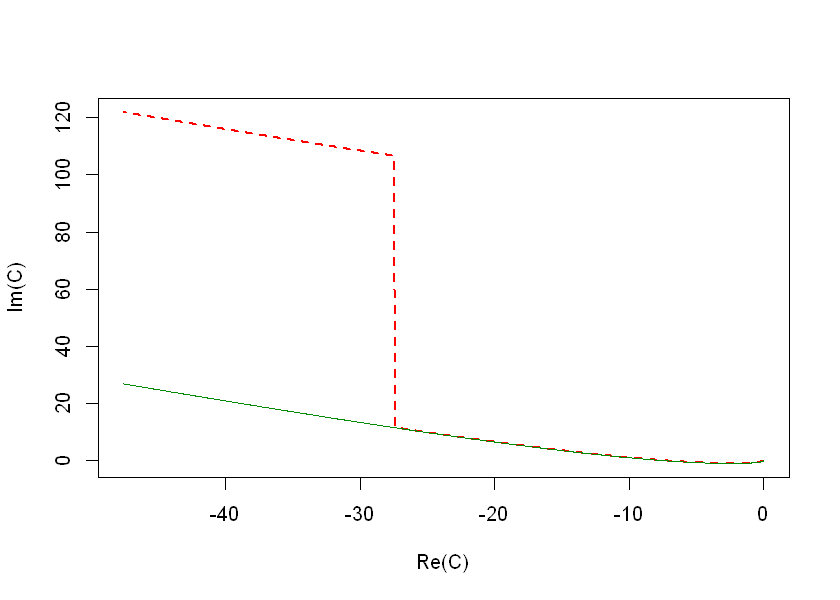

In [9]:
plot(Re(x$C.Heston),Im(x$C.Heston),type="l",col="red",lty=2,lwd=2,xlab="Re(C)",ylab="Im(C)")
lines(Re(x$C.JG),Im(x$C.JG),type="l",col="green4",lwd=1.5)

Figure 1: $C^{Heston}(\cdot)$ in red, $C^{JG}(\cdot)$ in green.

### Solutions in the literature


One conventional
resolution is to keep careful track of the winding number in the
integration [(14)](#eq:hestonformula) so as to remain on the same
Riemann sheet. 

This leads to practical implementation problems
because standard numerical integration routines cannot be used.  The
paper of [Kahl and Jäckel]<sup id="cite_ref-KJ" class="reference"><a href="#cite_note-KJ"><span>[</span>10<span>]</span></a></sup> concerns itself with this
problem and provides an ingenious resolution.

### A better solution

* With *our* definition [(4)](#eq:hestonCD) of $C(u,\tau)$,  whenever the imaginary part of the argument of the logarithm is zero, the real part is positive.

    * Plotted in the complex plane, the argument of the logarithm never cuts the negative real axis.
    * This result was proved by [Albrecher, Mayer, Schoutens and Tistaert]<sup id="cite_ref-AMST" class="reference"><a href="#cite_note-AMST"><span>[</span>1<span>]</span></a></sup>.


* It follows that with our definition of $C(u,\tau)$, taking the principal value of the logarithm leads to a continuous integrand over the full range of integration.

### The rough Heston characteristic function

- There exist a number of standard numerical techniques, such as the Adams scheme, for solving fractional differential equations such as the rough Heston fractional Riccati equation.
    - These techniques are all slow!
    
    
- Recently, [Gatheral and Radoičić]<sup id="cite_ref-GR" class="reference"><a href="#cite_note-GR"><span>[</span>10]</a></sup> showed how to approximate the solution of the rough Heston fractional Riccati equation by a rational function.
    - This approximation solution is just as fast as the classical Heston solution and appears to be more accurate than the Adams scheme for any reasonable number of time steps!

### Computing option prices from the characteristic function

It turns out (see [Carr and Madan]<sup id="cite_ref-CarrMadan" class="reference"><a href="#cite_note-CarrMadan"><span>[</span>4<span>]</span></a></sup> and [Lewis]<sup id="cite_ref-Lewis" class="reference"><a href="#cite_note-Lewis"><span>[</span>11<span>]</span></a></sup>) that it is quite
straightforward to get option prices by inverting the characteristic
function of a given stochastic process (if it is known in closed-form).


The formula we will use is a special case of formula (2.10) of Lewis (as
usual we assume zero interest rates and dividends):

<blockquote><div style="background-color:#add8e6; color:#FFFFFF; font-style: normal;  " ><h4>
Formula (2.10) of Lewis</h4>
</div>
<div style="background-color:#E8E8E8; color:#000000; font-style: normal; ">
<br>
<a name="eq:lewis"></a>(7)
$$
C(S,K,t,T)=S-\sqrt{SK}\frac{1}{\pi}\int_0^\infty\frac{du}{u^2+\frac{1}{4}}
\,\mathrm{Re}\left[e^{-iuk}\varphi_t^T\left(u-i/2\right)\right]
$$
<br>
<br>

</div>

</blockquote>


with $k=\log\left(\frac{K}{S}\right)$. We now proceed to prove this
formula.

### Heston greeks

It is worth noting that taking derivatives of the Heston option value
with respect to $x$ or $v$ in order to compute delta, gamma, vega and so on is
extremely straightforward because the functions $C(u,\tau)$ and
$D(u,\tau)$ are independent of $x$ and $v$.

### Proof of [(7)](#eq:lewis)

A covered call position has the payoff $\min[S_T,K]$ where $S_T$ is the
stock price at time $T$ and $K$ is the strike price of the call.


Consider the Fourier transform of this covered call position $G(k,\tau)$
with respect to the log-strike $k := \log{(K/F)}$ defined by


$$\hat G(u,\tau)=\int\limits_{-\infty}^{\infty}e^{i \,u\, k}G(k,\tau) \,dk$$

Denoting time-to-expiration by $\tau = T-t$, and setting interest rates
and dividends to zero as usual, we have that

\begin{eqnarray*}
\frac{1}{S}\hat G(u,\tau)&=&\int\limits_{-\infty}^{\infty}\,e^{i\, u\, k}\,
\mathbb{E}\left[\min[e^{x_\tau},e^k)^+] \right]\,dk\\
&=&\mathbb{E}\left[\int\limits_{-\infty}^{\infty}\,e^{i\, u\, k}\,
\min[e^{x_\tau},e^k)^+] \,dk \right]\\
&=&\mathbb{E}\left[\int\limits_{-\infty}^{x_\tau}\,e^{i\, u\, k}\, e^k
\,dk+\int\limits_{x_\tau}^{\infty}\,e^{i\, u\, k}\,
e^{x_\tau} \,dk \right]\\
&=&\mathbb{E}\left[\frac{e^{(1+i
u)x_\tau}}{1+i u}-\frac{e^{(1+i u)x_\tau}}{i u} \right]\textrm{ only if } 0<\mathrm{Im}[u]<1!\\
&=&\frac{1}{ u(u-i)}\mathbb{E}\left[{e^{(1+i u)x_\tau}} \right]\\
&=&\frac{1}{ u(u-i)}\,\phi_\tau(u-i)
\end{eqnarray*}

by definition of the characteristic function $\phi_\tau(u)$.

* Note that the transform of the covered call value exists only if $0<\mathrm{Im}[u]<1$.

    * It is easy to see that this derivation would go through pretty much as above with other payoffs.

    * The region where the transform exists depends on the payoff.

To get the call price in terms of the characteristic function, we
express it in terms of the covered call and invert the Fourier
transform, integrating along the line $\mathrm{Im}[u]=1/2$. Then

\begin{eqnarray*}
C(S,K,T)&=&S- S \frac{1}{2 \pi}\int_{-\infty+i/2}
^{\infty+i/2}\frac{du}{u(u-i)}\,\phi_T(u-i)\,e^{-i k u}\\
&=&S- S \frac{1}{2 \pi}\int_{-\infty}
^{\infty}\frac{du}{(u+i/2)(u-i/2)}\,\phi_T(u-i/2)\,e^{-i k (u+i/2)}\\
&=&S-\sqrt{SK}\frac{1}{\pi}\int_0^\infty\frac{du}{u^2+\frac{1}{4}}
\,\mathrm{Re}\left[e^{-iuk}\phi_T\left(u-i/2\right)\right]
\end{eqnarray*}

with $k=\log\left(\frac{K}{S}\right)$.

### R implementation of the Lewis formula

In [10]:
option.OTM.raw

function (phi, k, t) 
{
    integrand <- function(u) {
        Re(exp(-(0+1i) * u * k) * phi(u - (0+1i)/2, t)/(u^2 + 
            1/4))
    }
    k.minus <- (k < 0) * k
    res <- exp(k.minus) - exp(k/2)/pi * integrate(integrand, 
        lower = 0, upper = Inf, rel.tol = 1e-08)$value
    return(res)
}

- Note that there is only one numerical integration here.  


- In the version presented in Chapter 2 of [The Volatility Surface]<sup id="cite_ref-TVS" class="reference"><a href="#cite_note-TVS"><span>[</span>7<span>]</span></a></sup>, two integrations are required.
    - The option price is then given by the difference between two large numbers, introducing numerical error.

### The Heston model in R

* In the next few slides, we will exhibit an implementation of  the Heston model in R.


* We can then develop some intuition for the behavior of the model through experiment.

### Black-Scholes

First, we need an implementation of the Black-Scholes formula (this is in `BlackScholes.R`).

In [11]:
BSFormula

function (S0, K, T, r, sigma) 
{
    x <- log(S0/K) + r * T
    sig <- sigma * sqrt(T)
    d1 <- x/sig + sig/2
    d2 <- d1 - sig
    pv <- exp(-r * T)
    return(S0 * pnorm(d1) - pv * K * pnorm(d2))
}

### Implied volatility computation

Then, we need an implied volatility computation (this is also in `BlackScholes.R`).

In [12]:
BSImpliedVolCall

function (S0, K, T, r, C) 
{
    nK <- length(K)
    sigmaL <- rep(1e-10, nK)
    CL <- BSFormula(S0, K, T, r, sigmaL)
    sigmaH <- rep(10, nK)
    CH <- BSFormula(S0, K, T, r, sigmaH)
    while (mean(sigmaH - sigmaL) > 1e-10) {
        sigma <- (sigmaL + sigmaH)/2
        CM <- BSFormula(S0, K, T, r, sigma)
        CL <- CL + (CM < C) * (CM - CL)
        sigmaL <- sigmaL + (CM < C) * (sigma - sigmaL)
        CH <- CH + (CM >= C) * (CM - CH)
        sigmaH <- sigmaH + (CM >= C) * (sigma - sigmaH)
    }
    return(sigma)
}

### A numerical example

First generate some option prices.

In [13]:
vols <- c(0.23,0.20,0.18)
K <- c(0.9,1.0,1.1) 
(optVals <- BSFormula(S0=1,K,T=1,r=0,sigma=vols))

[1] 0.14589696 0.07965567 0.03557678

Then compute implied volatilities.

In [14]:
(impVols <- BSImpliedVolCall(S0=1, K, T=1, r=0, C=optVals))

[1] 0.23 0.20 0.18

### Pick some Heston parameters

In [15]:
subHeston <- list(lambda = 0.6067,rho = -0.7571,eta = 0.2928,vbar = 0.0707,v = .0654)

option.OTM(phiHeston(subHeston), 0, 1)

impvol.phi(phiHeston(subHeston))(0,1)

[1] 0.09701406

[1] 0.2437805

### Now draw a Heston 1-year smile

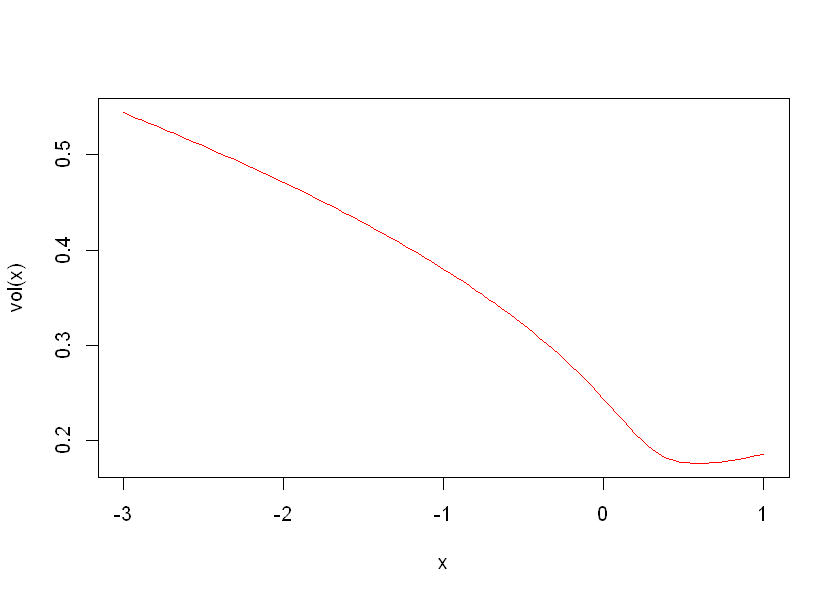

In [16]:
vol <- function(k){sapply(k,function(x){impvol.phi(phiHeston(subHeston))(x,1)})}
curve(vol(x),from=-3,to=1,col="red")

### Some notable features of R



* Complex arithmetic with $\text{1i}$.

* Functional programming:
    * This is what allows us to code a function which is called as: 
    
            impvol.phi(phiHeston(paramsBCC))(0,1)
    
    * We can define a function that returns a function (and so on indefinitely).
    
    * We could even conveniently define a new function: 
          
            impvolBCC <-
                impvol.phi(phiHeston(paramsBCC)) 

* We can conceptually separate parameters and variables rather than having to carry all the parameters around with each function call.

### The Heston smile with BCC parameters

First we list the BCC parameters.

In [17]:
paramsBCC <- list(lambda = 1.15,rho = -0.64,eta = 0.39,vbar = 0.04,v = .04)

Then, generate the smile as before.

   user  system elapsed 
   0.12    0.00    0.14 

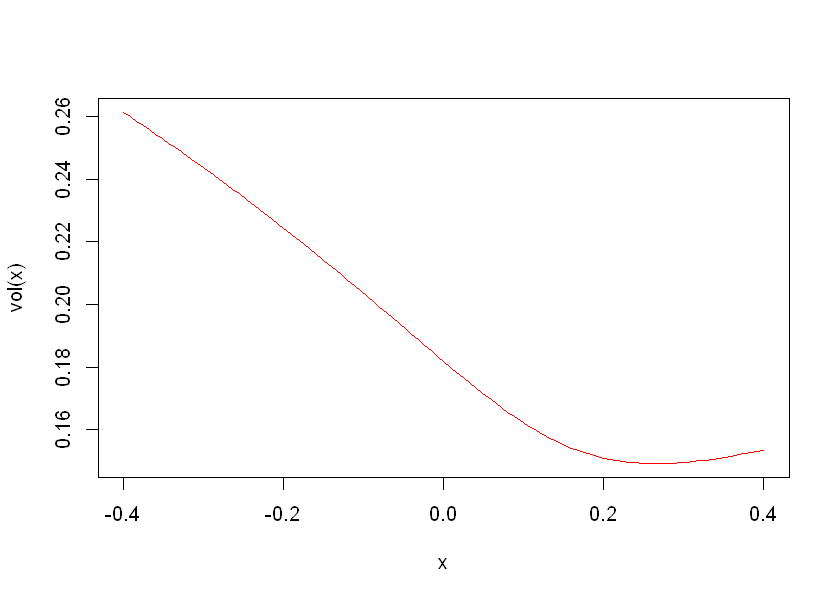

In [18]:
vol <- function(k){
    sapply(k,function(x){impvol.phi(phiHeston(paramsBCC))(x,1)})}
system.time(curve(vol(x),from=-.4,to=.4,col="red"))

Figure 2: The $\tau=1$ Heston smile with BCC parameters.

### Sensitivity of the Heston smile to $\rho$

In [19]:
subH <- function(incr){
    tmp <- paramsBCC
    tmp$rho <- tmp$rho+incr
    return(tmp)
}

vol <- function(phi)function(k){sapply(k,function(x){impvol.phi(phi)(x,1)})}

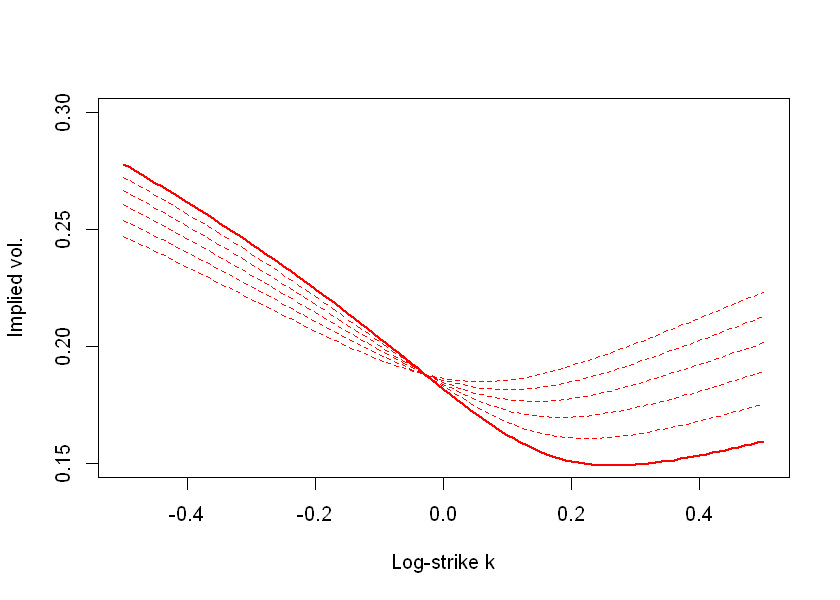

In [20]:
yrange <- c(0.15,.3)
curve(vol(phiHeston(paramsBCC))(x),from=-.5,to=.5,col="red",ylim=yrange,lwd=2,ylab="Implied vol.",xlab="Log-strike k")
for (incr in seq(0.1,0.5,0.1))
    {
    curve(vol(phiHeston(subH(incr)))(x),from=-.5,to=.5,col="red",lty=2,add=T)
    }

Figure 3: The dotted lines are smiles with $\rho=\rho_{BCC}+\{0.1,0.2,0.3,0.4,0.5\}$.

### Sensitivity of the Heston smile to $\eta$

In [21]:
subH <- function(incr){
    tmp <- paramsBCC
    tmp$eta <- tmp$eta+incr
    return(tmp)
}

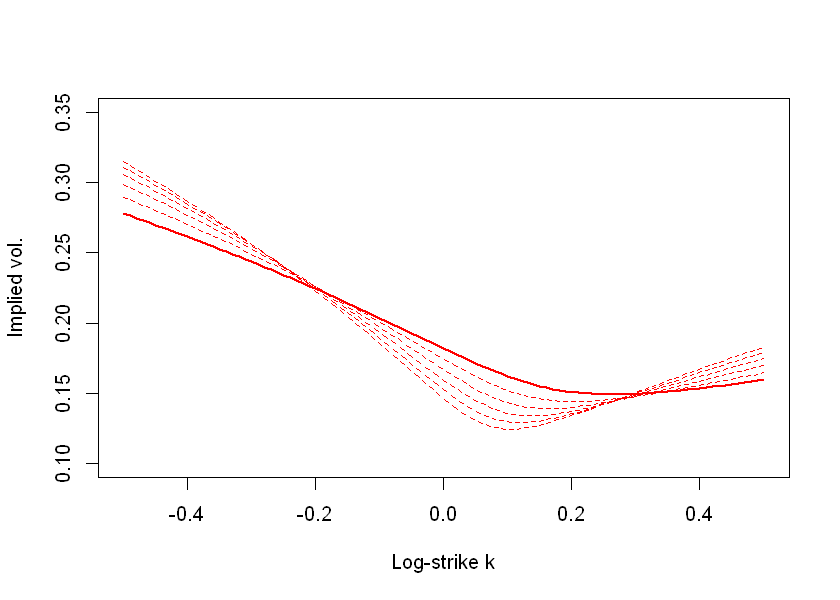

In [22]:
yrange <- c(0.1,.35)
curve(vol(phiHeston(paramsBCC))(x),from=-.5,to=.5,col="red",ylim=yrange,lwd=2,ylab="Implied vol.",xlab="Log-strike k")
for (incr in seq(0.1,0.5,0.1))
    {
    curve(vol(phiHeston(subH(incr)))(x),from=-.5,to=.5,col="red",lty=2,add=T)
    }

Figure 4: The dotted lines are smiles with $\eta=\eta_{BCC}+\{0.1,0.2,0.3,0.4,0.5\}$. 

### Sensitivity of the Heston smile to $\lambda$


In [23]:
subH <- function(incr){
    tmp <- paramsBCC
    tmp$lambda <- tmp$lambda+incr
    return(tmp)
}

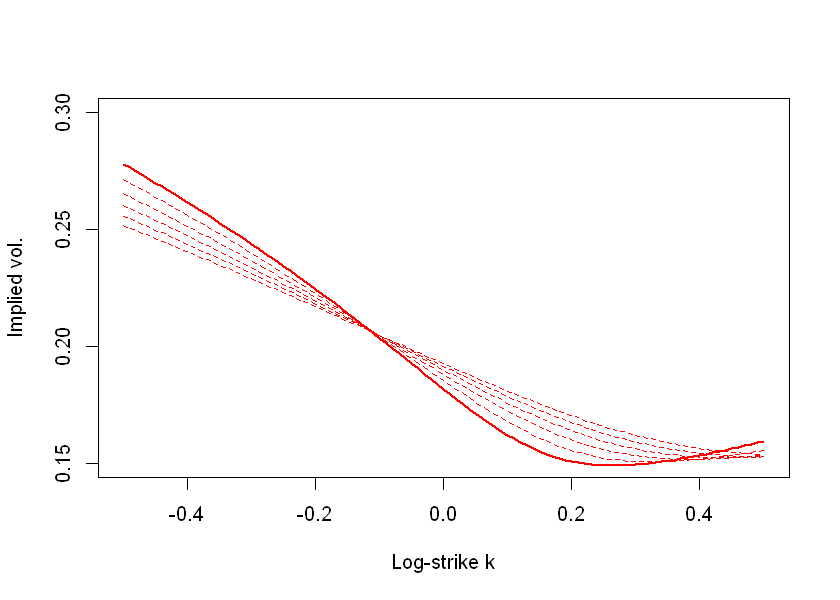

In [24]:
yrange <- c(0.15,.3)
curve(vol(phiHeston(paramsBCC))(x),from=-.5,to=.5,col="red",ylim=yrange,lwd=2,ylab="Implied vol.",xlab="Log-strike k")
for (incr in seq(0.5,2.5,0.5))
    {
    curve(vol(phiHeston(subH(incr)))(x),from=-.5,to=.5,col="red",lty=2,add=T)
    }

Figure 5: The dotted lines are smiles with $\lambda=\lambda_{BCC}+\{0.5,1.0,1.5,2.0,2.5\}$.

### Another sensitivity plot

Now increase both $\lambda$ and $\eta$ keeping the ratio $\eta^2/\lambda$ constant.

In [25]:
subH <- function(incr){
    tmp <- paramsBCC
    tmp$eta <- tmp$eta+incr
    tmp$lambda <- tmp$lambda*(tmp$eta/paramsBCC$eta)^2
    return(tmp)
}

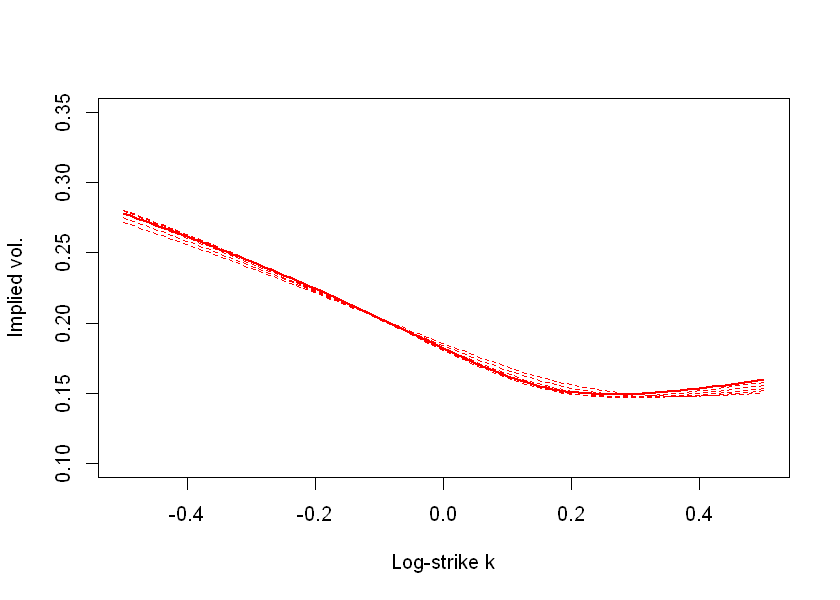

In [26]:
yrange <- c(0.1,.35)
curve(vol(phiHeston(paramsBCC))(x),from=-.5,to=.5,col="red",ylim=yrange,lwd=2,ylab="Implied vol.",xlab="Log-strike k")
for (incr in seq(0.1,0.5,0.1))
    {
    curve(vol(phiHeston(subH(incr)))(x),from=-.5,to=.5,col="red",lty=2,add=T)
    }


Figure 6: The dotted lines are smiles with $\eta=\eta_{BCC}+\{0.1,0.2,0.3,0.4,0.5\}$ and $\lambda$ incremented so as to keep the ratio $\lambda/\eta^2$ constant. 

### Variance of $v_T$ in the Heston model (old version)

Applying Itô's Lemma, we get

$$
d v^2= 2\,v\,dv+(dv)^2
$$

With $\hat v = \E[v]$, this gives

$$
\E[ d v^2]=-2\,\lambda\,\left(\E[v^2]-\bar v\,\hat v\right)\,dt+\eta^2\,\hat v\,dt
$$

Also

$$
d \hat v^2=-2\,\lambda\,\left(\hat v^2-\bar v\,\hat v\right)\,dt
$$

So
$$
d \Var(v)=-2\,\lambda\,\Var(v)\,dt+\eta^2\,\hat v\,dt
$$

Integrating, we get

$$
\Var(v_T)=\int_0^T\,e^{-2\,\lambda\,(T-t)}\,\eta^2\,\hat v_t\,dt
$$

Putting $\hat v_t = \bar v$ for simplicity, we obtain

\begin{eqnarray*}
\Var(v_T)&=&\eta^2\,\bar v\,\int_0^T\,e^{-2\,\lambda\,(T-t)}\,dt\\
&=&\eta^2\,\bar v\,\frac{1-e^{-2\,\lambda\,T}}{2\,\lambda}\\
&\to&\frac{\eta^2\,\bar v}{2\,\lambda} \text{ as }T \to \infty
\end{eqnarray*}

* The smile depends only on the distribution of integrated variance and its correlation with the stock price, so for longer expirations, the smile should depend (roughly) only on $\rho$ and the ratio $\eta^2\,\bar v/\lambda$.

### Variance of $v_T$ in affine forward variance models

$$
\beas
v_T^2 = \xi_T(T)^2 &=& \xi_t(T)^2 + \int_t^T\,d\xi_s(T)^2\\
&=& \xi_t(T)^2 + 2\,\int_t^T\,\xi_s(T)\,d\xi_s(T)+\int_t^T\,d\angl{\xi(T)}_s.
\eeas
$$

Taking expectations (recall that $\xi_t(T) = \eef{v_T}$), we obtain

$$
\varf{v_T} = \eef{\int_t^T\,v_s\,\kappa(s-t)^2\,ds}= \int_t^T\,\xi_t(s)\,\kappa(s-t)^2\,ds.
$$

### Application to the Heston model

With $\kappa(\tau) = \eta\,e^{-\lambda\,\tau}$ and putting $\xi_t(s) = \bar v$ (a flat curve), we obtain

$$
\beas
\varf{v_T} &=& \eta^2\,\bar v\,\int_t^T\,e^{-2\lambda\,(s-t)}\,ds\\
&=&\frac{\eta^2\,\bar v}{2\,\lambda}\,\left\{1-e^{-2\lambda\,(T-t)} \right\}.
\eeas
$$

 - The same results as before.


### Application to the rough Heston model

With $\kappa(\tau) = \frac{1}{\Gamma(\alpha)}\,\eta\,\tau^{\alpha-1}$ and putting $\xi_t(s) = \bar v$ (a flat curve), we obtain

$$
\beas
\varf{v_T} &=& \frac{\eta^2\,\bar v}{\Gamma(\alpha)^2}\,\int_t^T\,(s-t)^{2 \alpha-2}\,ds\\
&=&\frac{\eta^2\,\bar v}{(2 \alpha-1)\,\Gamma(\alpha)^2}\,(T-t)^{2\,\alpha-1}\\
&=&\frac{\eta^2\,\bar v}{2 H\,\Gamma(\alpha)^2}\,(T-t)^{2 H}\\
\eeas
$$

 - Variance of $v_T$ is power-law in $\tau=T-t$.


### Autocorrelation of variance in the Heston model

The autocorrelation function of variance is estimated as 

$$
\rho(\tau)\sim\frac{\Cov (v_t, v_{t+\tau} )}{\Var(v_t)}
$$

To compute this, first compute
$$
\E\left[\left.v_{t+\tau}\right|v_t\right]=\bar v+(v_t-\bar v)\,e^{-\lambda\, \tau}
$$

The unconditional expectation of $v_t$ is $\bar v$ so we get

\begin{eqnarray*}
\Cov\left[v_{t+\tau},v_t\right]&=&\E\left[\E\left[v_{t+\tau}\,v_t|v_t\right]\right]-\bar v^2\\
&=&\E\left[v_t\,(\bar v +(v_t-\bar v)\,e^{-\lambda\,\tau})\right]-\bar v^2\\
&=&e^{-\lambda\,\tau}\,\Var[v_t]
\end{eqnarray*}

and the autocorrelation function in the Heston model is just
$$
\rho(\tau)=e^{-\lambda\,\tau}.
$$

### Empirical autocorrelation of volatility

In [27]:
load("oxfordRVnew.rData")

In [28]:
v <- as.numeric(rv.list[[".SPX"]][,1])  # Pick spx.rk
aclog <-acf(log(v),lag=100,plot=F)

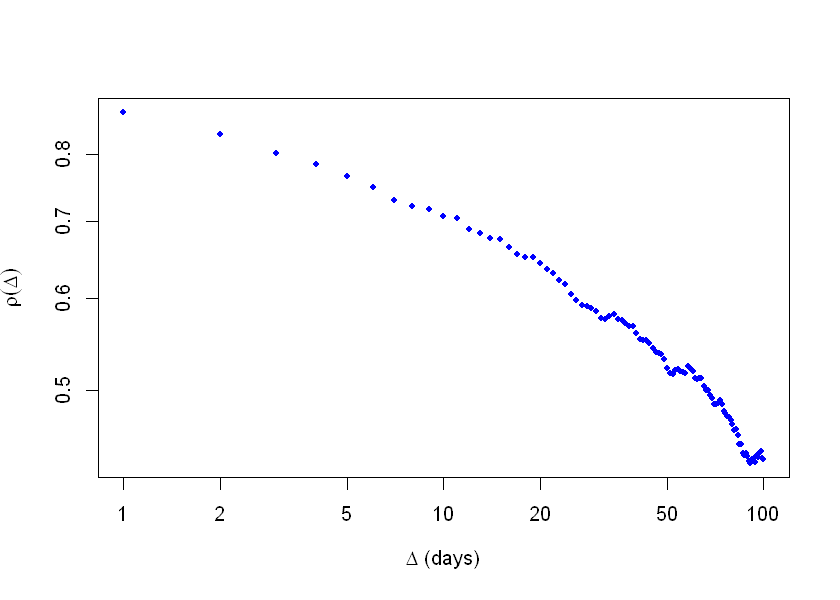

In [29]:
plot(aclog$lag[-1],aclog$acf[-1],pch=20,ylab=expression(rho(Delta)),xlab=expression(paste(Delta," (days)")),log="xy",col="blue")

Figure 7: The empirical autocovariance function of SPX realized kernal estimates of integrated variance.

Now add the Heston autocorrelation function with $\lambda=1$, $\lambda=2$ and $\lambda=5$ respectively.

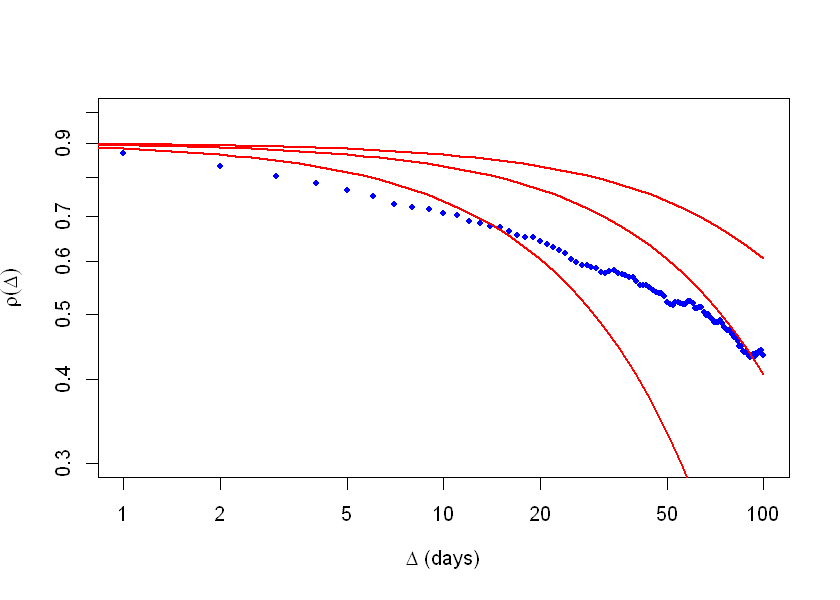

In [30]:
plot(aclog$lag[-1],aclog$acf[-1],pch=20,ylab=expression(rho(Delta)),ylim=c(0.3,1),
     xlab=expression(paste(Delta," (days)")),log="xy",col="blue")
curve(0.9*exp(-x/252),from=0.001,to=100,col="red",add=T,lwd=2,log="xy")
curve(0.9*exp(-x*2/252),from=0.001,to=100,col="red",add=T,lwd=2,log="xy")
curve(0.9*exp(-x*5/252),from=0.001,to=100,col="red",add=T,lwd=2,log="xy")

Figure 8: The empirical autocovariance function of SPX realized kernel estimates of integrated variance is not consistent with classical Heston.

### Model versus empirical observation

* In the Heston model, the variance autocorrelation function $\sim \exp\left\{-\lambda\,\tau\right\}$.
    
    * This is true for all conventional one-factor stochastic volatility models where the volatility process is of the form:
$$
dv=-\lambda\,(v-\bar v)\,dt +\text{ noise}.
$$
    - Single-factor stochastic volatility models are not compatible with the volatility time series!

* We can match the autocorrelation function more realistically by adding another timescale as in the DMR model we presented in Lecture 2.
    * Or even better, as we can see from the plot, we can reproduce the observed autocorrelation function using a rough volatility model<sup id="cite_ref-GJR" class="reference"><a href="#cite_note-GJR"><span>[</span>8<span>]</span></a></sup>. 

### The rough Heston smile

In [31]:
params.rHeston <- list(H=0.05,nu=0.4,rho=-.65,eta=0.4)
xiCurve <- function(t){0.025+0*t}

In [32]:
phi <- phiRoughHestonDhApprox(params.rHeston, xiCurve, dh.approx= d.h.Pade33, n=20)

   user  system elapsed 
   1.48    0.00    1.50 

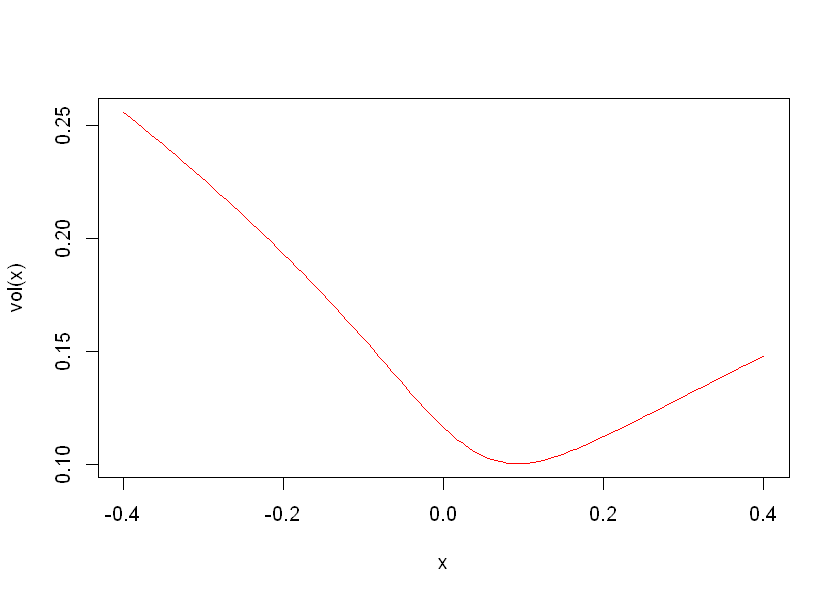

In [33]:
vol <- function(k){
    sapply(k,function(x){impvol.phi(phi)(x,1)})}
system.time(curve(vol(x),from=-.4,to=.4,col="red"))

### Sensitivity of the rough Heston smile to $\eta$

In [34]:
subH <- function(incr){
    tmp <- params.rHeston
    tmp$eta <- tmp$eta+incr
    return(tmp)
}

vol <- function(params)function(k){
    phi <- phiRoughHestonDhApprox(params, xiCurve, dh.approx= d.h.Pade33, n=20)
    sapply(k,function(x){impvol.phi(phi)(x,1)})}

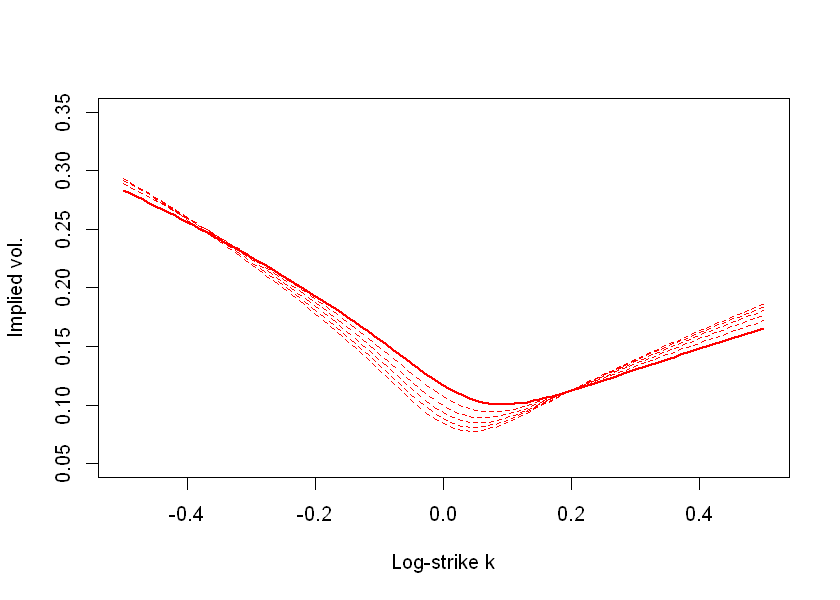

In [35]:
yrange <- c(0.05,.35)
curve(vol(subH(0))(x),from=-.5,to=.5,col="red",ylim=yrange,lwd=2,ylab="Implied vol.",xlab="Log-strike k")
for (incr in seq(0.1,0.5,0.1))
    {
    curve(vol(subH(incr))(x),from=-.5,to=.5,col="red",lty=2,add=T)
    }

Figure 9: The dotted lines are smiles with $\eta=\eta_{BCC}+\{0.1,0.2,0.3,0.4,0.5\}$. 

### Sensitivity of the rough Heston 1 year smile to $H$


In [36]:
subH <- function(incr){
    tmp <- params.rHeston
    tmp$H <- tmp$H+incr
    return(tmp)
}

vol <- function(params)function(k){
    phi <- phiRoughHestonDhApprox(params, xiCurve, dh.approx= d.h.Pade33, n=20)
    sapply(k,function(x){impvol.phi(phi)(x,1)})}

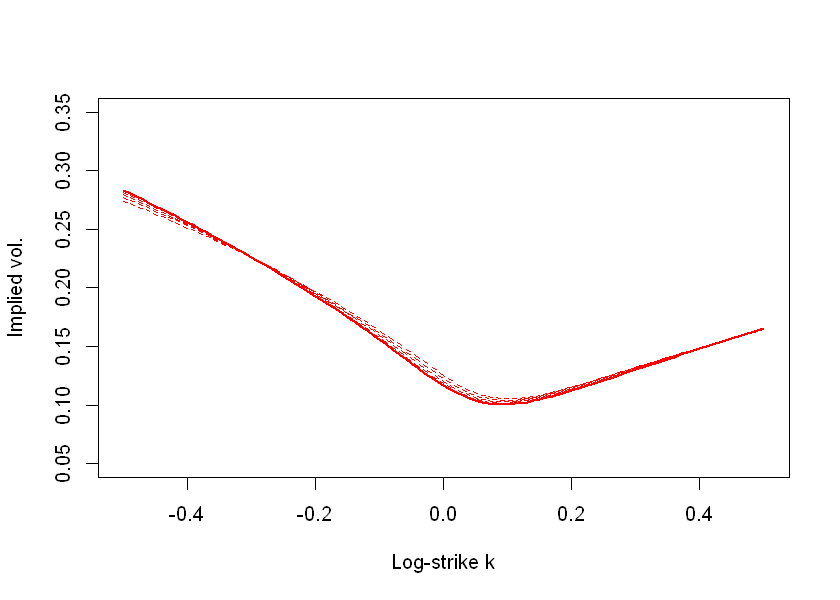

In [37]:
yrange <- c(0.05,.35)
curve(vol(subH(0))(x),from=-.5,to=.5,col="red",ylim=yrange,lwd=2,ylab="Implied vol.",xlab="Log-strike k")
for (incr in seq(0.1,0.4,0.1))
    {
    curve(vol(subH(incr))(x),from=-.5,to=.5,col="red",lty=2,add=T)
    }

Figure 9: The dotted lines are 1 year smiles with $H \mapsto H +\{0.1,0.2,0.3,0.4\}$. 

### Sensitivity of the rough Heston 1 week smile to $H$


In [38]:
subH <- function(incr){
    tmp <- params.rHeston
    tmp$H <- tmp$H+incr
    return(tmp)
}

vol <- function(params)function(k){
    phi <- phiRoughHestonDhApprox(params, xiCurve, dh.approx= d.h.Pade33, n=20)
    sapply(k,function(x){impvol.phi(phi)(x,1/52)})}

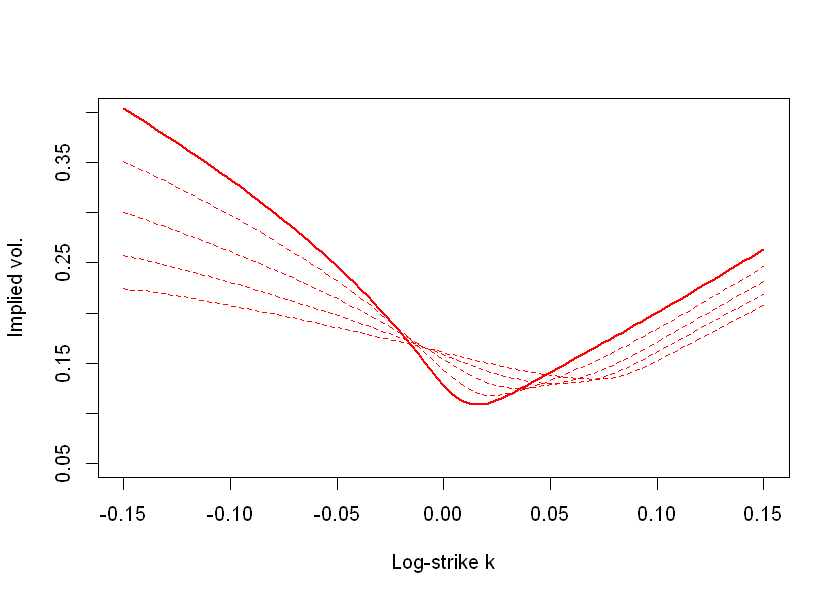

In [39]:
yrange <- c(0.05,.4)
curve(vol(subH(0))(x),from=-.15,to=.15,col="red",ylim=yrange,lwd=2,ylab="Implied vol.",xlab="Log-strike k")
for (incr in seq(0.1,0.4,0.1))
    {
    curve(vol(subH(incr))(x),from=-.15,to=.15,col="red",lty=2,add=T)
    }

Figure 10: The dotted lines are 1 week smiles with $H \mapsto H +\{0.1,0.2,0.3,0.4\}$. The smile flattens as we increase $H$.

### Summary of Lecture 3

* We introduce forward variance and affine models.

* We showed how to compute the characteristic function for any affine forward variance model.

* We applied these general results to the classical Heston and rough Heston models.



### References

<br />

<div class="reflist" style="list-style-type: decimal;">

<ol>
  
  <li id="cite_note-AMST"><span class="mw-cite-backlink"><b><a href="#cite_ref-AMST">^</a></b></span>   Albrecher, Hansjörg, Philipp Mayer, Wim Schoutens and Jurgen Tistaert, The Little Heston Trap, <span>*Wilmott Magazine*</span> 83–92 (January 2007).</li>
 
  <li id="cite_note-BCC"><span class="mw-cite-backlink"><b><a href="#cite_ref-BCC">^</a></b></span>   Bakshi, Gurdip, Charles Cao and Zhiwu Chen, Empirical performance of alternative pricing models. <span>*Journal of Finance*</span> <span>**52**(5)</span>, 2003–2049 (1997).</li>
  
   <li id="cite_note-BG"><span class="mw-cite-backlink"><b><a href="#cite_ref-BG">^</a></b></span>   Lorenzo Bergomi and Julien Guyon, The smile in stochastic volatility models. <span>*SSRN*</span> (2011).</li>
   
   <li id="cite_note-CarrMadan"><span class="mw-cite-backlink"><b><a href="#cite_ref-CarrMadan">^</a></b></span> Peter Carr and Dilip Madan, Option valuation using the Fast Fourier Transform, <span>*Journal of Computational Finance*</span> <span>**2**</span>(4), 61–73 (1999).</li>

  <li id="cite_note-CIR"><span class="mw-cite-backlink"><b><a href="#cite_ref-CIR">^</a></b></span>   Cox, John, Jonathan Ingersoll and Stephen Ross, A theory of the term structure of interest rates. <span>*Econometrica*</span>
<span>**53**(2)</span>, 385–408 (1985).</li>

  <li id="cite_note-EER"><span class="mw-cite-backlink"><b><a href="#cite_ref-EER">^</a></b></span>   Omar El Euch and Mathieu Rosenbaum, The characteristic function of rough Heston models, <span>*Mathematical Finance*, forthcoming (2018).</li>

  <li id="cite_note-TVS"><span class="mw-cite-backlink"><b><a href="#cite_ref-TVS">^</a></b></span>Jim Gatheral, <span>*The Volatility Surface: A Practitioner’s
Guide*</span>, John Wiley and Sons, Hoboken, NJ (2006).</li>

<li id="cite_note-GJR"><span class="mw-cite-backlink"><b><a href="#cite_ref-GJR">^</a></b></span> Jim Gatheral, Thibault Jaisson and Mathieu Rosenbaum, Volatility is rough, *Quantitative Finance* **18**(6), 933-949 (2018).</li> 

<li id="cite_note-AFV"><span class="mw-cite-backlink"><b><a href="#cite_ref-AFV">^</a></b></span>
Jim Gatheral and Martin Keller-Ressel, Affine forward variance models,  available at https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3105387 (2017).

<li id="cite_note-GR"><span class="mw-cite-backlink"><b><a href="#cite_ref-GR">^</a></b></span>
Jim Gatheral and Radoš Radoičić, Rational approximation of the rough Heston solution,  available at https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3191578 (2018).

 <li id="cite_note-Lewis"><span class="mw-cite-backlink"><b><a href="#cite_ref-Lewis">^</a></b></span>   Alan L. Lewis,  <span>*Option Valuation under Stochastic Volatility with Mathematica Code*</span>, Finance Press: Newport Beach, CA (2000).</li>

  

</ol>